# Observations and Insights 

Summary of the Results:

•According to the data, there are over 100 trials conducted for each drug regimen. Usually, when working with multiple variables then there should be minimum sample size of 30 or more and in this data set all the drug treatments have at least 100 trials/ data points which shows that data is statistically significant. 
Sample size resource: https://www.statisticssolutions.com/sample-sizeformula/#:~:text=Some%20researchers%20do%2C%20however%2C%20support,minimum%20sample%20size%20of%2030.
<img src="bargraphtotalmice.png">
                  

•The study has also revealed that it has almost equal male and female mice. It would interesting to analyze if gender had an effect on the efficacy of the drug treatments or tumor volume.
<img src="piechartgendercomp.png">                              

•Based on the analysis of the final Tumor Volumes in four most promising drug regimen; Capomulin and Ramicane both appear to be effective than the other two drug regimens.  Infubinol drug was the only drug that had the outlier point in the data while other three drugs’ data was well within the range. 
   <img src="BoxplotFourDrugtreat.png">           
•In the study, mouse weight correlated strongly with average tumor volume as the r2 value is 0.84 which shows that the data points fall well within regression line. 

  <img src="WeightvsTumor.png">                           


In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
merge_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [104]:
# Checking the number of mice in the DataFrame.
mice_count = len(merge_data["Mouse ID"].unique())
print(f"There are {mice_count} experiments in this study.")


There are 249 experiments in this study.


In [105]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merge_data.loc[merge_data.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [106]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merge_data[merge_data["Mouse ID"]== 'g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [107]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_data[merge_data["Mouse ID"]. isin(duplicate_mouse) == False ]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [108]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(clean_df["Mouse ID"].unique())
print(f"There are a total of {mouse_count} mice used in this study.")



There are a total of 248 mice used in this study.


## Summary Statistics

In [109]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.


# Create a new DataFrame 
new_df = clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
mean = new_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = new_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = new_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
standard_deviation = new_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = new_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem})

summary_df=summary_df.round(2)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

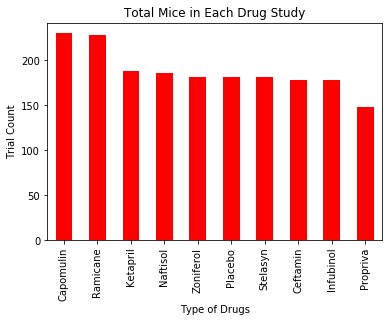

<Figure size 432x288 with 0 Axes>

In [110]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
treatment_count = clean_df["Drug Regimen"].value_counts()
x_axis = treatment_count.index
y_axis = treatment_count.values

treatment_count.plot(kind="bar", facecolor='red')
plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Mice in Each Drug Study")
plt.xticks(rotation=90)
plt.show()
plt.savefig("Figures/bargraphtotalmice.png")

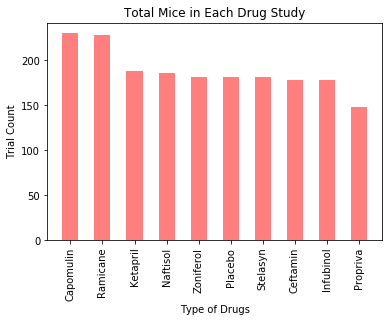

<Figure size 432x288 with 0 Axes>

In [111]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
treatment_count = clean_df["Drug Regimen"].value_counts()

x_axis = np.arange(0,len(y_axis),1)
y_axis = treatment_count.values
x_drugs = treatment_count.index

plt.bar(x_drugs, y_axis, color='r', alpha=0.5, align="center", width=.5)
plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Mice in Each Drug Study")
plt.xticks(rotation=90)

plt.show()
plt.savefig("Figures/bargraphtotalmice1.png")

## Pie Plots

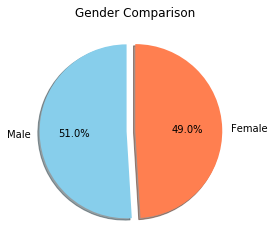

<Figure size 432x288 with 0 Axes>

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df["Sex"].value_counts()
labels = gender_count.values
sizes = gender_count.values
colors= ["skyblue", "coral"]
explode= [0.1,0]

gender_count.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Gender Comparison")
plt.ylabel(" ")
plt.show()
plt.savefig("Figures/piechartgendercomp1.png")

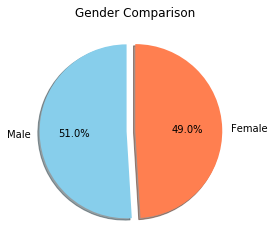

<Figure size 432x288 with 0 Axes>

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = clean_df["Sex"].value_counts()
labels = gender_count.index
sizes = gender_count.values
colors= ["skyblue", "coral"]
explode= [0.1,0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Gender Comparison")
plt.show()
plt.savefig("Figures/piechartgendercomp.png")

## Quartiles, Outliers and Boxplots

In [114]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

max_tumor_volume = clean_df.groupby("Mouse ID").max().reset_index()

merge_dataset = max_tumor_volume[["Mouse ID","Timepoint"]].merge(clean_df, on=["Mouse ID","Timepoint"], how='left')

merge_dataset
merge_dataset.round(2)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.97,2,Infubinol,Female,20,23
1,a251,45,65.53,1,Infubinol,Female,21,25
2,a262,45,70.72,4,Placebo,Female,17,29
3,a275,45,63.00,3,Ceftamin,Female,20,28
4,a366,30,63.44,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.71,0,Propriva,Female,12,26
244,z578,45,30.64,0,Ramicane,Male,11,16
245,z581,45,62.75,3,Infubinol,Female,24,25
246,z795,45,65.74,3,Naftisol,Female,13,29


In [115]:
#  Four Most Promising Drug Regimens : Capomulin, Ramicane, Infubinol, and Ceftamin.
capomulin= merge_dataset.loc[merge_dataset['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merge_dataset.loc[merge_dataset['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol= merge_dataset.loc[merge_dataset['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merge_dataset.loc[merge_dataset['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

# Capomulin Quartiles
quartile_cap = capomulin.quantile([.25,.5,.75])
lower_quartile = quartile_cap[.25]
upper_quartile = quartile_cap[.75]
iqr = upper_quartile-lower_quartile

# Capomulin Outliers
lower_outlier = lower_quartile-(1.5*iqr)
upper_outlier = upper_quartile+(1.5*iqr)

print(f"Any number below {round(lower_outlier, 2)} is considered an outlier")
print(f"Any number above {round(upper_outlier, 2)} is considered an outlier")

Any number below 20.7 is considered an outlier
Any number above 51.83 is considered an outlier


In [116]:
# Ramicane Quartiles
quartile_ramicane = ramicane.quantile([.25,.5,.75])
lower_ramicane = quartile_ramicane[.25]
upper_ramicane = quartile_ramicane[.75]
iqr = upper_ramicane-lower_ramicane

# Outliers
lower_ramicane_outlier = lower_ramicane-(1.5*iqr)
upper_ramicane_outlier = upper_ramicane+(1.5*iqr)

print(f"Any number below {round(lower_ramicane_outlier, 2)} is considered an outlier")
print(f"Any number above {round(upper_ramicane_outlier, 2)} is considered an outlier")

Any number below 17.91 is considered an outlier
Any number above 54.31 is considered an outlier


In [117]:
# Infubinol Quartiles

quartile_infubinol=infubinol.quantile([.25,.5,.75])
lower_in= quartile_infubinol[.25]
upper_in=quartile_infubinol[.75]
iqr= upper_in-lower_in

#Infubionol Outliers
lower_infubinol_outlier= lower_in-(1.5*iqr)
upper_infubinol_outlier= upper_in+(1.5*iqr)

print(f"Any number below {round(lower_infubinol_outlier, 2)} is considered an outlier")
print(f"Any number above {round(upper_infubinol_outlier, 2)} is considered an outlier")

Any number below 36.83 is considered an outlier
Any number above 82.74 is considered an outlier


In [118]:
# Ceftmain quartiles
quartile_ceftamin=ceftamin.quantile([.25,.5,.75])
lower_ce= quartile_ceftamin[.25]
upper_ce=quartile_ceftamin[.75]
iqr= upper_ce-lower_ce

# Ceftmain Outliers
lower_ceftamin_outlier= lower_ce-(1.5*iqr)
upper_ceftamin_outlier= upper_ce+(1.5*iqr)

print(f"Any number below {round(lower_ceftamin_outlier, 2)} is considered an outlier")
print(f"Any number above {round(upper_ceftamin_outlier, 2)} is considered an outlier")

Any number below 25.36 is considered an outlier
Any number above 87.67 is considered an outlier


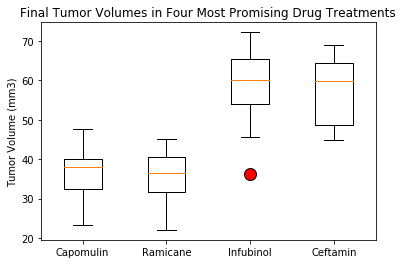

<Figure size 432x288 with 0 Axes>

In [119]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interes
final_tumor = dict(markerfacecolor= "red", markersize=12)

plt.boxplot([capomulin, ramicane, infubinol, ceftamin], labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops= final_tumor)

plt.title("Final Tumor Volumes in Four Most Promising Drug Treatments")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
plt.savefig("Figures/BoxplotFourDrugTreat.png")

## Line and Scatter Plots

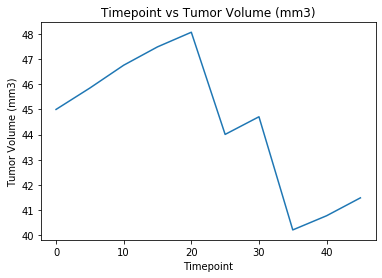

<Figure size 432x288 with 0 Axes>

In [120]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_line = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse_line = clean_df.loc[clean_df['Mouse ID'] == 'l509']

plt.plot(mouse_line["Timepoint"], mouse_line["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()
plt.savefig("Figures/TimepointvsTumor.png")

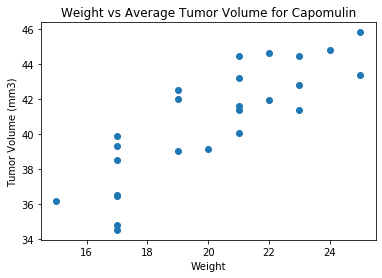

<Figure size 432x288 with 0 Axes>

In [121]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_weight = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_avg = capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume for Capomulin")
plt.show()
plt.savefig("Figures/ScatterPlotWeightvsTM.png")


## Correlation and Regression

In [122]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0], 2)}")

The correlation between both factors is 0.84


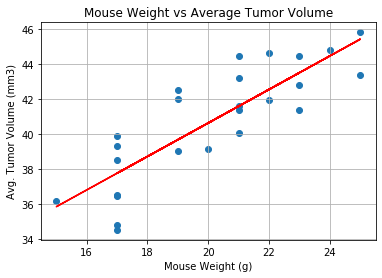

The r-squared value is 0.8419363424694718
 The euqation of regression line is y = 0.95x + 21.55


In [123]:

x_values = capomulin_avg["Weight (g)"]
y_values = capomulin_avg["Tumor Volume (mm3)"]
plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.grid(True)
plt.show()
print(f"The r-squared value is {rvalue}")
print(f" The euqation of regression line is {line_equation}")

In [124]:
plt.savefig("Figures/WeightvsTumor.png")

<Figure size 432x288 with 0 Axes>